In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

sns.set_style('white')

In [3]:
iris = sns.load_dataset('iris')
iris.head(5)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

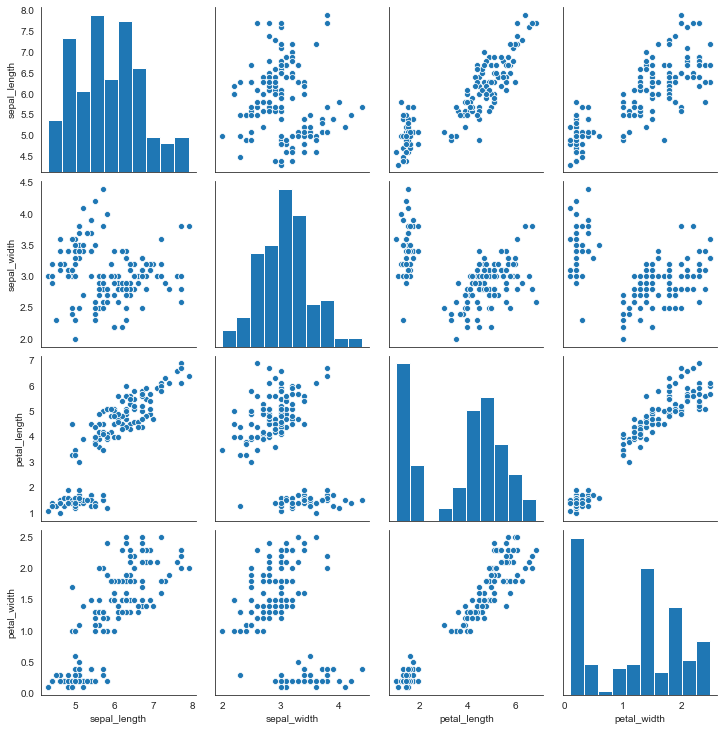

In [4]:
sns.pairplot(iris)

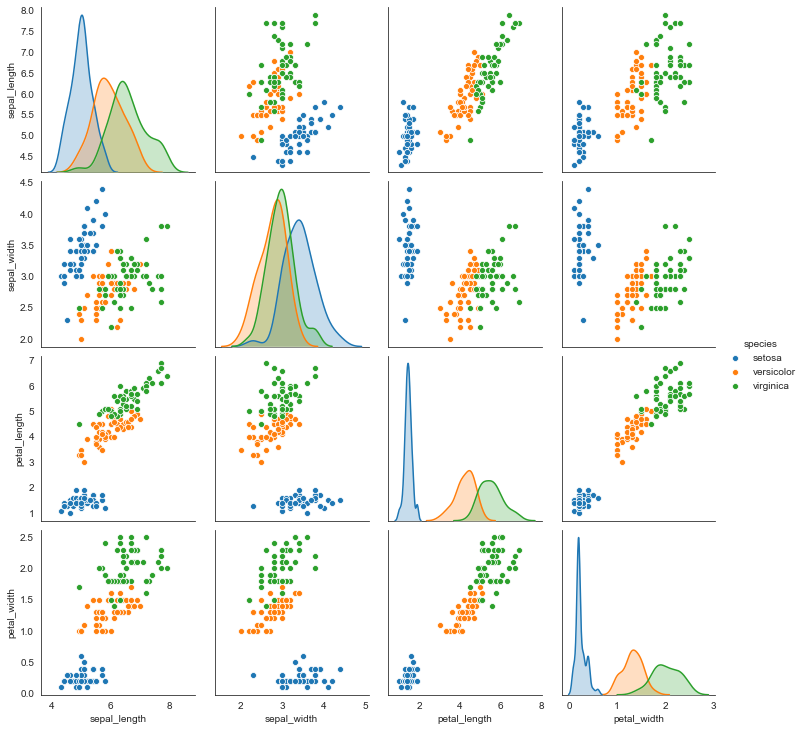

In [5]:
sns.pairplot(iris, hue='species')

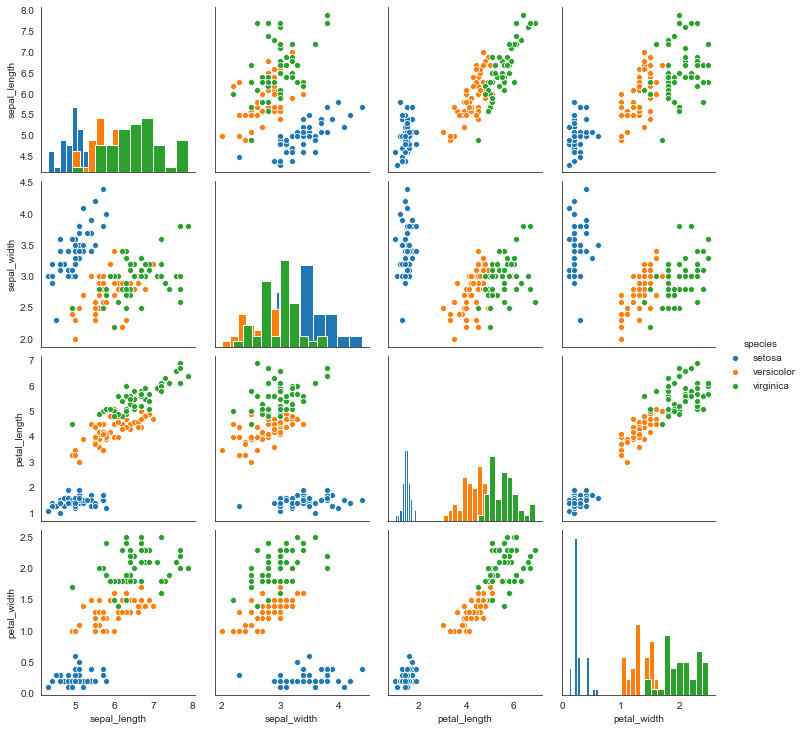

In [6]:
sns.pairplot(iris, hue='species',diag_kind="hist")

In [7]:
!pip install altair
import altair as alt

In [8]:
alt.Chart(iris).mark_circle().encode(alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')).repeat(row=['sepal_length', 'sepal_width','petal_length','petal_width'],
    column=['sepal_length', 'sepal_width','petal_length','petal_width']).interactive()

alt.RepeatChart(...)

In [9]:
from pandas.plotting import parallel_coordinates

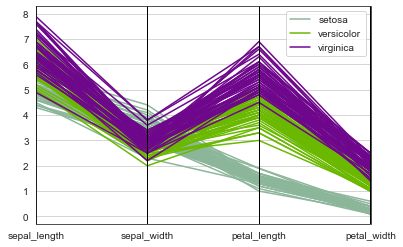

In [10]:
parallel_coordinates(iris,'species')

In [11]:
from pandas.plotting import andrews_curves

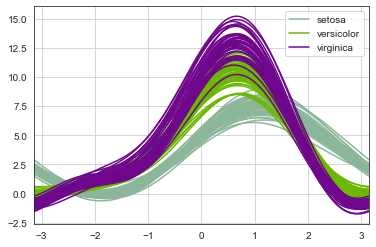

In [12]:
andrews_curves(iris, 'species')

In [13]:
iris_transformed = iris.reset_index().melt(['species', 'index'])
alt.Chart(iris_transformed).mark_line().encode(
    x='variable:N',
    y='value:Q',
    color='species:N',
    detail='index:N',
    opacity=alt.value(0.5),
).properties(width=500)

alt.Chart(...)

Iris_transformed graph shows data from value 0, and transformed graph are more easy to tell the trend and contrast. 

In [14]:
iris.head(2)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [15]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_only_features = iris[features]
iris_only_features.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 

In [17]:
pca_iris_fitted = pca.fit(iris_only_features)

In [18]:
pca_iris_fitted.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [19]:
iris_pca = pca_iris_fitted.transform(iris_only_features)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [20]:
iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
iris_pca_df.head()

PC1       PC2
0 -2.684126  0.319397
1 -2.714142 -0.177001
2 -2.888991 -0.144949
3 -2.745343 -0.318299
4 -2.728717  0.326755

In [21]:
iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
iris_pca_df.insert(2,'species',iris['species'])
iris_pca_df.head()

PC1       PC2 species
0 -2.684126  0.319397  setosa
1 -2.714142 -0.177001  setosa
2 -2.888991 -0.144949  setosa
3 -2.745343 -0.318299  setosa
4 -2.728717  0.326755  setosa

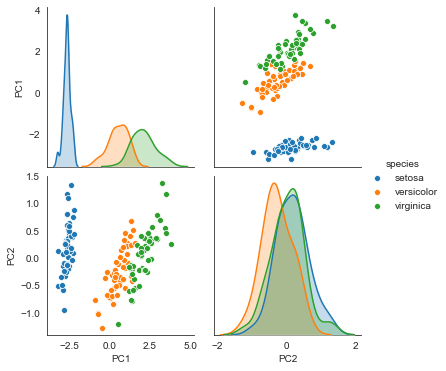

In [22]:
sns.pairplot(iris_pca_df,hue='species')

The biggest difference between pca pairplot and the plots above is pca plots is made up of two priciple components.The pca pairplot emphasize the variation and points out the patter of each species.

In [23]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data

In [24]:
n_samples, n_features = faces.shape
print(n_samples)
print(n_features)

400
4096


In [25]:
print(faces[0].shape)
faces[0]

(4096,)


array([0.6694215 , 0.6363636 , 0.6487603 , ..., 0.08677686, 0.08264463,
       0.07438017], dtype=float32)

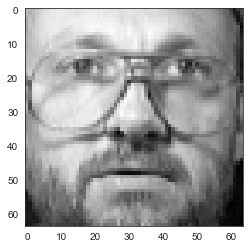

In [26]:
plt.imshow(np.reshape(faces[0],(64,-1)),cmap = plt.cm.gray)

In [27]:
from sklearn.decomposition import PCA

In [28]:
n_components=6
pca = PCA(n_components=n_components)

In [29]:
pca.fit(faces)

PCA(n_components=6)

In [30]:
pca.components_

array([[-0.00419117, -0.00710947, -0.00933606, ...,  0.00018513,
         0.00337963,  0.00318823],
       [-0.02859139, -0.03328833, -0.03784651, ...,  0.02962782,
         0.02721297,  0.02488899],
       [ 0.00135691, -0.0003258 , -0.00019797, ..., -0.01541366,
        -0.01370979, -0.01188342],
       [ 0.00112441, -0.00179023, -0.01168218, ...,  0.02943003,
         0.02781921,  0.02521855],
       [-0.02384219, -0.02359039, -0.02216083, ..., -0.0424404 ,
        -0.04007544, -0.0411039 ],
       [ 0.02910033,  0.03130473,  0.02877822, ..., -0.01635792,
        -0.01637211, -0.01490704]], dtype=float32)

In [31]:
pca.components_.shape

(6, 4096)

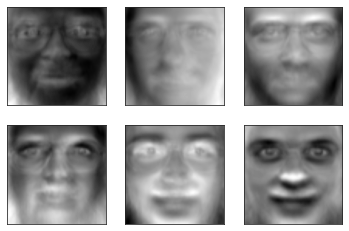

In [32]:
image_shape = (64, 64)

for i, comp in enumerate(pca.components_, 1):
    plt.subplot(2, 3, i)
    plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
    plt.xticks(())
    plt.yticks(())

In [33]:
faces_pca_transformed = pca.transform(faces)

In [34]:
faces_pca_transformed.shape

(400, 6)

In [35]:
faces_pca_transformed[0]

array([ 0.81579906, -4.1440315 ,  2.4832675 , -0.9030876 ,  0.831356  ,
        0.8864863 ], dtype=float32)

([], <a list of 0 Text major ticklabel objects>)

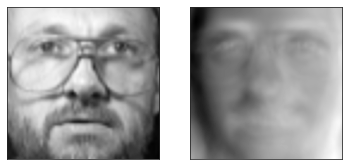

In [36]:
# display the first face image 
plt.subplot(1, 2, 1)
plt.imshow(faces[0].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
plt.xticks(())
plt.yticks(())

# display the second component
plt.subplot(1, 2, 2)
plt.imshow(pca.components_[1].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
plt.xticks(())
plt.yticks(())

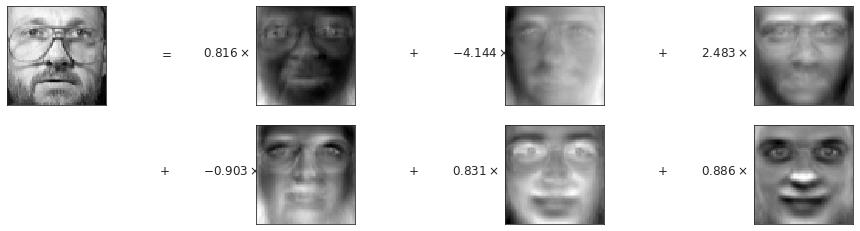

In [37]:
from matplotlib import gridspec

def display_image(ax, image):
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_xticks(())
    ax.set_yticks(())

def display_text(ax, text):
    ax.text(.5, .5, text, size=12)
    ax.axis('off')

face_idx = 0

plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(2, 10, width_ratios=[5,1,1,5,1,1,5,1,1,5])

# display the face
ax = plt.subplot(gs[0])
display_image(ax, faces[face_idx].reshape(image_shape))

# display the equal sign
ax = plt.subplot(gs[1])
display_text(ax, r'$=$')

# display the 6 coordinates
for coord_i, gs_i in enumerate( [2,5,8,12,15,18] ):
    ax = plt.subplot(gs[gs_i])
    display_text( ax, r'$%.3f \times $' % faces_pca_transformed[face_idx][coord_i] )

# display the 6 components
for comp_i, gs_i in enumerate( [3,6,9,13,16,19] ):
    ax = plt.subplot(gs[gs_i])
    display_image( ax, pca.components_[comp_i].reshape(image_shape) )

# display the plus sign
for gs_i in [4,7,11,14,17]:
    ax = plt.subplot(gs[gs_i])
    display_text(ax, r'$+$')

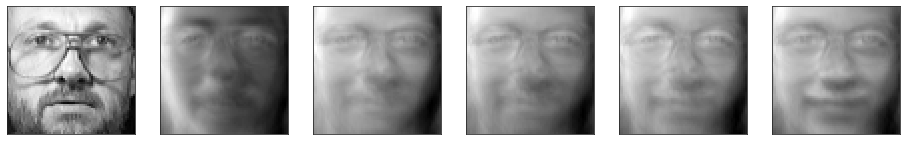

In [38]:
f, axes = plt.subplots(1, 6, figsize=(16,4))

faceid = 0

constructed_faces = []
for i in range(2, 10):
    constructed_faces.append(np.dot(faces_pca_transformed[faceid][:i], pca.components_[:i]))

# the face that we want to construct. 
display_image(axes[0], faces[0].reshape(image_shape))

for idx, ax in enumerate(axes[1:]):
    display_image(ax, constructed_faces[idx].reshape(image_shape))

C:\Users\Zoey\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


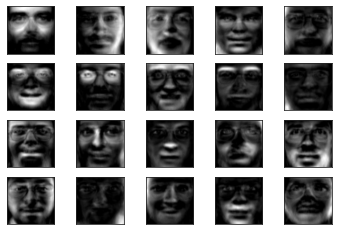

In [39]:
from sklearn.decomposition import NMF
n_components=20
nmf = NMF(n_components=n_components)
nmf_fitted = nmf.fit(faces)

for i, comp in enumerate(nmf_fitted.components_, 1):
    plt.subplot(4, 5, i)
    plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian')
    plt.xticks(())
    plt.yticks(())

In [40]:
faces_nmf_tranformed = nmf_fitted.transform(faces)

In [41]:
faces_nmf_tranformed[0]

array([0.55986834, 0.        , 0.32688567, 0.        , 0.32771242,
       0.48689562, 0.59661436, 0.53803355, 0.3224714 , 0.15961719,
       0.        , 0.08432745, 0.09481414, 0.        , 0.5963672 ,
       0.22238259, 0.        , 0.33438987, 0.22552949, 0.        ],
      dtype=float32)

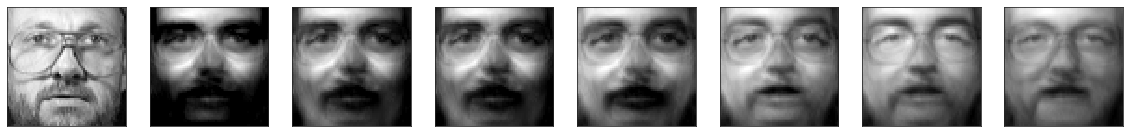

In [42]:
f, axes = plt.subplots(1, 8, figsize=(20,4))
faceid = 0
constructed_faces = []
# your code here
for i in range(2, 10):
    constructed_faces.append(np.dot(faces_nmf_tranformed[faceid][:i], nmf.components_[:i]))
    
display_image(axes[0], faces[0].reshape(image_shape))

for idx, ax in enumerate(axes[1:]):
    display_image(ax, constructed_faces[idx].reshape(image_shape))


In [43]:
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.datasets import load_iris

iris = load_iris()

In [44]:
# print (iris)

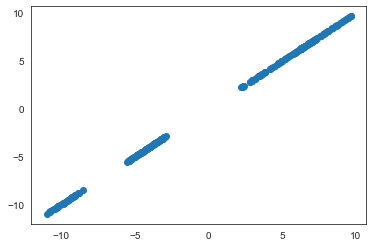

In [45]:
tsne = TSNE(n_components=2,perplexity = 50) 
tsne_iris_fitted = tsne.fit_transform(iris['data'])
plt.scatter(tsne_iris_fitted,tsne_iris_fitted)

In [46]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [47]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

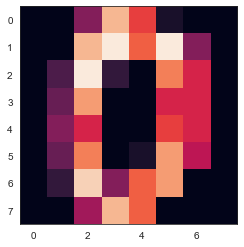

In [48]:
# Task 9. Use imshow to display the first image.
plt.imshow(np.reshape(digits.data[0],(8,-1)))

In [49]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [50]:
tsne = TSNE(n_components=2, init='pca', random_state=0)

In [51]:
digits_proj = tsne.fit_transform(X)

In [52]:
palette = np.array(sns.color_palette("hls", 10))

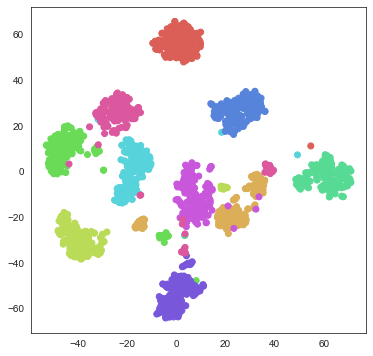

In [53]:
plt.figure(figsize = (6,6))
plt.scatter(digits_proj[:,0], digits_proj[:,1],c=palette[y])

In [54]:
def plot_scatter(projection):
    plt.figure(figsize = (6,6))
    plt.scatter(projection[:,0], projection[:,1],c=palette[y])
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(projection[y == i, :], axis=0)
        txt = plt.text(xtext, ytext, str(i), fontsize=24)

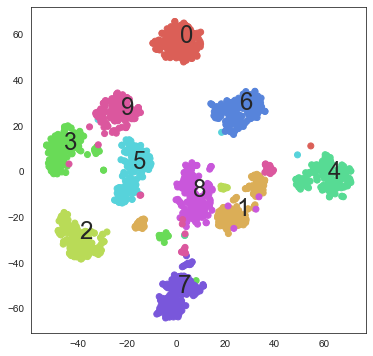

In [55]:
plot_scatter(digits_proj)

In [83]:
mds = MDS(n_components=2,n_init = 4, random_state=0)

In [84]:
digits_proj = mds.fit_transform(X)

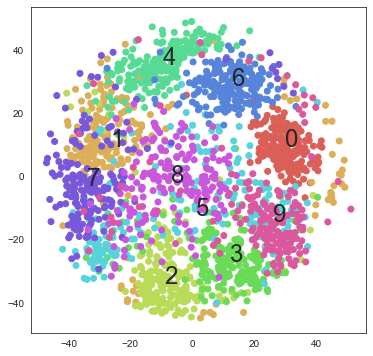

In [85]:
plot_scatter(digits_proj)

In [70]:
isomap = Isomap(n_components=2)

In [71]:
digits_proj = isomap.fit_transform(X)

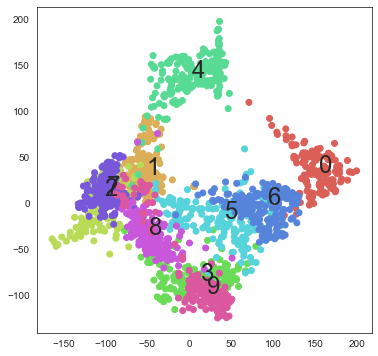

In [72]:
plot_scatter(digits_proj)

PCA: I found PCA emphasize the variation in the data. It shows principle component with the biggest variation, and pc2 shows obviously less variation than pc1.
MDS: The scatters are gathered together as a round but classified by their color.
Isomap: Seems the catogory has more data has bigger color space.
t-SNE: the group of each color has longer distance than the other two graphs. It shows clearly that each color has its own space. According to (https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html), it has relatively longer running time.
